# Image Segmentation 

In [1]:
import cv2 as cv 
import matplotlib.pyplot as plt 
import numpy as np 

##  Thresholding Segmentation 

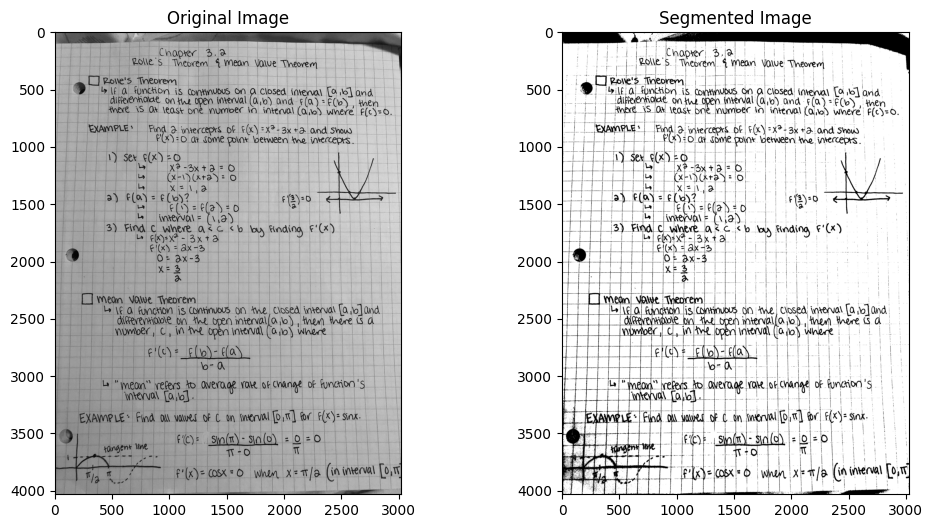

In [ ]:
## Simple thresholding ##

image = cv.imread("./images/handwritten.jpg", 0)

# apply thresholding on the image 
t = 120
retval, binary = cv.threshold(image, thresh=t, maxval=255, type=cv.THRESH_BINARY)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(image, cmap='grey')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(binary, cmap='grey')
plt.title("Segmented Image")

plt.show()

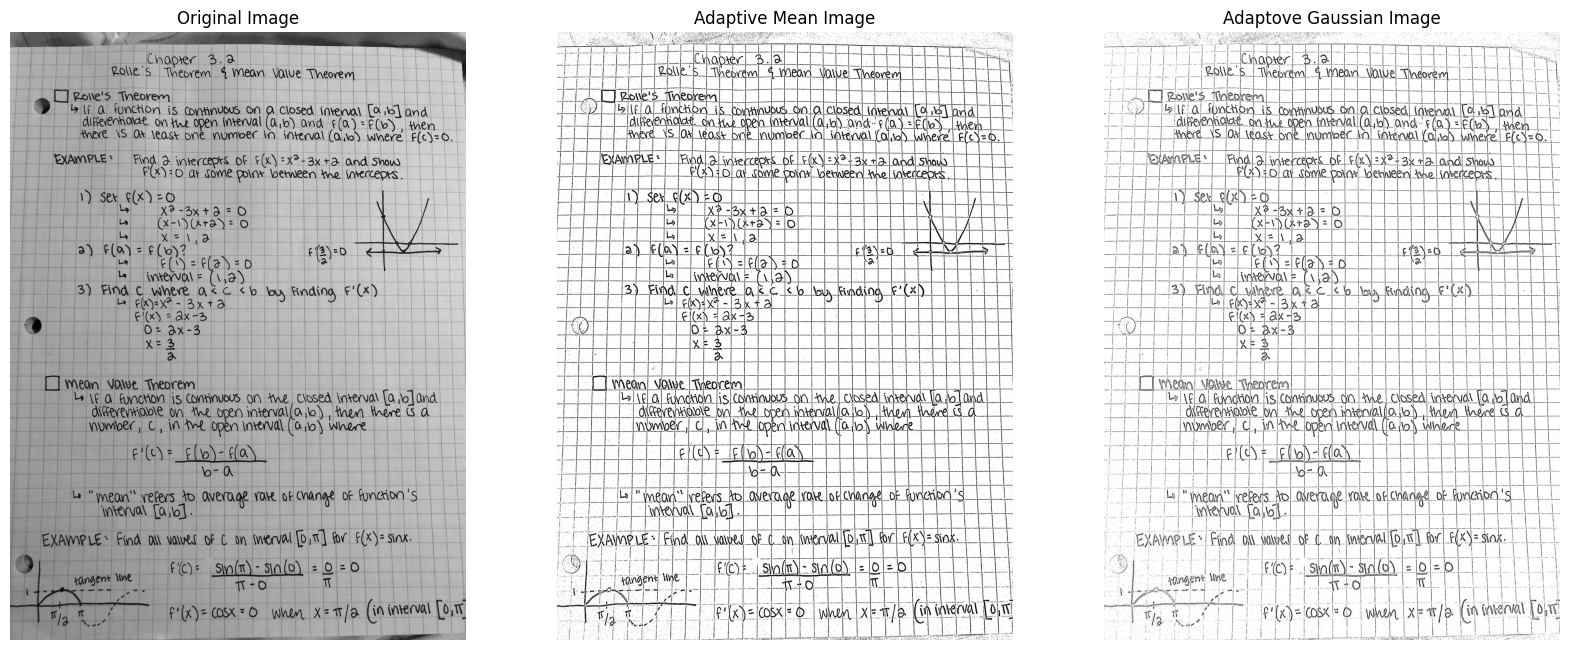

In [ ]:
## Adaptive Thresholding ##

adaptive_mean = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 9)
adaptive_gaussian = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 9)

plt.figure(figsize=(20,30))

plt.subplot(1,3,1)
plt.imshow(image, cmap='grey')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(adaptive_mean, cmap='grey')
plt.title("Adaptive Mean Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(adaptive_gaussian, cmap='grey')
plt.title("Adaptove Gaussian Image")
plt.axis('off')

plt.show()

# Play with the c value in the thresholding to make the image more clean

## k-means Clustering for Segmentation

In [ ]:
# kmeans can be done on the rgb image itself
image = cv.imread('./images/shapes.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Reshape image to use it in kmeans
# reshape the image, keeping 3 columns for each value in the array (rgb), all in a 2d list reshaped
# flattening of the image
pixel_values = image_rgb.reshape((-1,3))

print(pixel_values)

[[247 247 247]
 [247 247 247]
 [247 247 247]
 ...
 [247 247 247]
 [247 247 247]
 [247 247 247]]


In [18]:
# convert image in float value to use kmeans 
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2) # defining criteria and apply kmeans
k = 4 # number of classes 

# criteria define the stopping criteria for kmeans clustering algorithm 
# 0.2 define the accepted loss when stopping and max criteria as 100 iterations. 

_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [19]:
print("labels: \n", labels)
print("\nlabels shape: ", labels.shape)
print("\ncenters: \n", centers)


labels: 
 [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]

labels shape:  (547600, 1)

centers: 
 [[247.90712   242.72005   243.01018  ]
 [  2.1487255 175.04913    88.329475 ]
 [254.24905   119.179054   25.097229 ]
 [  2.66567   126.21679   248.14487  ]]


In [20]:
print(labels.flatten())
print(centers[labels.flatten()])

[0 0 0 ... 0 0 0]
[[247.90712 242.72005 243.01018]
 [247.90712 242.72005 243.01018]
 [247.90712 242.72005 243.01018]
 ...
 [247.90712 242.72005 243.01018]
 [247.90712 242.72005 243.01018]
 [247.90712 242.72005 243.01018]]


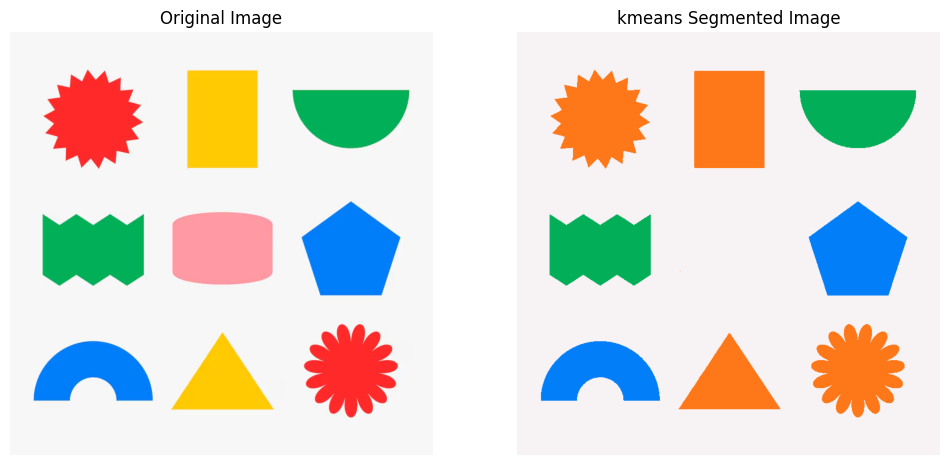

In [21]:
# create back the image based on centers
centers = np.uint8(centers)

# access each value based on the labels 
# you acces each pixel and assign the value of intensity corresponding to its class 
segmented_image = centers[labels.flatten()]

# reshape 
segmented_image = segmented_image.reshape(image_rgb.shape)

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title("kmeans Segmented Image")
plt.axis('off')


plt.show()

# When segmenting, the third class correspond to the the whole image background, infact the ;ast centroid which is close to white (gray) 
# is part of the segmentation

## Watershed Segmentation Algorithm

In [ ]:
image = cv.imread("./images/coin.jpg")
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image_rgb)

# create a copy of the image, as separate image memory 
original_image = image.copy()